# Playing with convolutions


Playing with convolutions: A notebook that looks at convolutions, purely independently of deep learning, and tests a few different varieties on images.

In this notebook, I will briefly introduce the 4W1H of convolutions, the 4W1H(Why,What,Where,When and How) are:
1. What is convolutions
2. Where we use convolutions
3. When we use convolutions
4. Why we use convolutions in CNN
5. How to use convolutions on image

- What is convolutions:

Convolutions is a mathematical method of integral transformation, and it is the result of summing two variables after they are multiplied in a certain range.

- Where we use convolutions:

Convolution is widely used in image processing, signal processing, natural language processing (NLP), acoustics, etc.

- When we use convolutions:

There have several examples.
1. For image processing, convolutions can be used for Sharpness Filter, Edge Detection, Motion Blur, etc. 
2. For signal processing, convolutions can be used for Signal Interference and Recognition, etc.
3. For NLP, convolutions can be used for Text Classification (such as TxetCNN), etc.
4. For acoustics, convolutions can be used for Echo Control, etc.

As deep learning becomes more and more popular, Lots of people use Convolutional Neural Network (CNN) to train and predict data.

- Why we use convolutions in CNN:

In CNN, convolution can help us to extract the feature of data.
Compared to traditional method, CNN can use the original pixel of the image as input and do not need to use Feature extraction algorithms such as SIFT. It reduce the running time.

It also has the following advantages: Parameter Sharing and Sparsity of Connections.
This two advantages can reduce the number of parameters, so that we can use less training data to train the model. 
A smaller number of parameters helps prevent overfitting.

- How to use convolutionson on image:

I test three different varieties of convolutions on image. There are Single-channel Convolution, Transposed Convolution and Multi-channel Convolution.

In order to show one of the ability of convolution - "Edge Detection", I will use the corresponding filter.


In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline


## Preparing the image

This image has three channels.

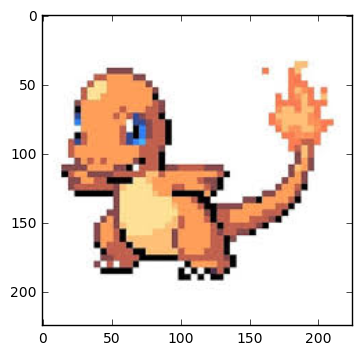

In [2]:
img = Image.open("charmander.jpg")  
plt.imshow(img)
img_array = np.asarray(img)

## 1.Single-channel Convolution
We can extract one of channels to create single channel convolution. In this example, we select the red one.

In [3]:
r_img,g_img,b_img=img.split()
r_img_array = np.asarray(r_img)

Create the Single-channel Convolution:

In [4]:
input_image_single = r_img_array.reshape(1,225,225,1)        # reshape the array so that tensorflow can use
input_image_single = tf.cast(input_image_single,tf.float32)
filters_single = tf.constant([                               # This filter can used for Vertical edge detection
    [
        [[1.0,0.0,-1.0],
         [1.0,0.0,-1.0],
         [1.0,0.0,-1.0]],
    ],
]) 

filterinput_single = tf.reshape(filters_single, [3, 3, 1, 1]) # reshape the array so that tensorflow can use

res_single = tf.nn.conv2d(input_image_single, filterinput_single, strides=[1,1,1,1], padding='SAME')

Show the Single-channel Convolution:

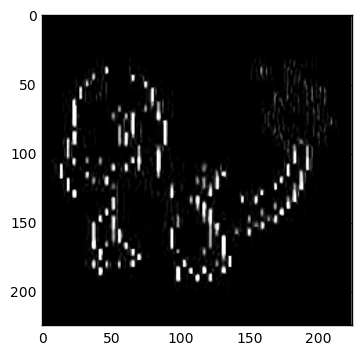

In [5]:
with tf.Session():
    res_single_np = res_single.eval()

convolution_single = Image.fromarray(res_single_np[0,:,:,0])
plt.imshow(convolution_single)

I used the filter for Vertical edge detection, and the Vertical edge has been detected.

## 2. Transposed Convolution
We can use the Single-channel Convolution as input image, and create transposed convolution.

One of the uses is restoring the size of the feature map.


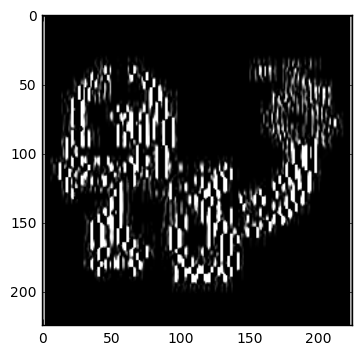

In [6]:
res_t= tf.nn.conv2d_transpose(res_single, filterinput_single, output_shape=[1,225,225,1], strides=[1, 1, 1, 1], padding='SAME')

with tf.Session():
    res_t_np = res_t.eval()

convolution_t = Image.fromarray(res_t_np[0,:,:,0])
plt.imshow(convolution_t)

# 3.Multi-channel Convolution
The Multi-channel Convolution is putting multiple Single-channel Convolutions together. 

Create the Multi-channel Convolution:

In [7]:
input_image_multi = img_array.reshape(1,225,225,3)         # reshape the array so that tensorflow can use
input_image_multi = tf.cast(input_image_multi,tf.float32)
filters_multi = tf.constant([                              # This filter can used for Horizontal edge detection
    [
        [[1.0,1.0,1.0],[0.0,0.0,0.0],[-1.0,-1.0,-1.0]],
        [[1.0,1.0,1.0],[0.0,0.0,0.0],[-1.0,-1.0,-1.0]],
        [[1.0,1.0,1.0],[0.0,0.0,0.0],[-1.0,-1.0,-1.0]],
    ],  
])
                                                            
filterinput_multi = tf.reshape(filters_multi, [3, 3, 3, 1]) # reshape the array so that tensorflow can use

res_multi = tf.nn.conv2d(input_image_multi, filterinput_multi, strides=[1,1,1,1], padding='SAME')

Show the Multi-channel Convolution:

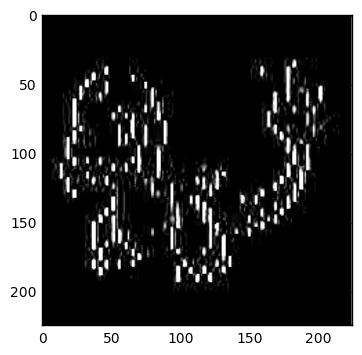

In [8]:
with tf.Session():
    res_multi_np = res_multi.eval()

convolution_multi = Image.fromarray(res_multi_np[0,:,:,0])
plt.imshow(convolution_multi)

I used the filter for Horizontal edge detection, and the Horizontal edge has been detected.